#1: Natural Language Processing (NLP)

In [16]:
!pip install nltk

In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [19]:
def preprocess_text(text):
  """Preprocesses and tokenizes text data.

  Args:
    text: The input text string.

  Returns:
    The preprocessed and tokenized text.
  """

  # Convert text to lowercase
  text = text.lower()

  # Remove punctuation
  text = ''.join(c for c in text if c.isalnum() or c.isspace())

  # Tokenize the text
  tokens = word_tokenize(text)

  # Remove stop words
  stop_words = set(stopwords.words('english'))
  tokens = [token for token in tokens if token not in stop_words]

  # Apply stemming (optional)
  stemmer = PorterStemmer()
  tokens = [stemmer.stem(token) for token in tokens]

  return tokens

In [20]:
text = "Dismissal of divorce plea due to non payment of interim maintenance can be reversed if husband deposits arrears, rules Madras High Court."
preprocessed_tokens = preprocess_text(text)
print(preprocessed_tokens)

['dismiss', 'divorc', 'plea', 'due', 'non', 'payment', 'interim', 'mainten', 'revers', 'husband', 'deposit', 'arrear', 'rule', 'madra', 'high', 'court']


#2: Text Generation

In [1]:
!pip install transformers

In [2]:
from transformers import AutoTokenizer, AutoModelForCausalLM

In [3]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")
model = AutoModelForCausalLM.from_pretrained("gpt2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [12]:
prompt = "Once upon a time, in a land far away..."

In [13]:
input_ids = tokenizer.encode(prompt, return_tensors="pt")

In [14]:
generated_text = model.generate(input_ids, max_length=100)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [15]:
print(tokenizer.decode(generated_text[0], skip_special_tokens=True))

Once upon a time, in a land far away...

The world is a strange place.

The world is a strange place.

The world is a strange place.

The world is a strange place.

The world is a strange place.

The world is a strange place.

The world is a strange place.

The world is a strange place.

The world is a strange place.

The world is a strange place


In [11]:
print(tokenizer.decode(generated_text[0], skip_special_tokens=True))

Once upon a time, in a land far away,i want to go america...but i dont know what to do...

I am a little confused about this. I am a little confused about this.

I am a little confused about this.

I am a little confused about this.

I am a little confused about this.

I am a little confused about this.

I am a little confused about this.

I am a little


#3: Prompt Engineering


In [36]:
!pip install transformers
!pip install datasets



In [37]:
from transformers import BartTokenizer, BartForConditionalGeneration
import torch

# Load pre-trained model and tokenizer
model_name = 'facebook/bart-large-cnn'
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [38]:
def summarize_text(text, max_length=150, min_length=50, length_penalty=2.0):
    inputs = tokenizer.encode("summarize: " + text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs, max_length=max_length, min_length=min_length, length_penalty=length_penalty, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary


In [39]:
# Example texts
text1 = "The quick brown fox jumps over the lazy dog. This is a common sentence used to demonstrate various types of font, keyboard layouts, and testing text. The sentence is often used in different languages."

text2 = "Artificial Intelligence (AI) refers to the simulation of human intelligence in machines programmed to think like humans and mimic their actions. The term may also be applied to any machine that exhibits traits associated with a human mind such as learning and problem-solving."

# Test prompt variations
prompt1 = "Summarize the following text."
prompt2 = "Please provide a brief summary of the text."

# Applying the function
summary1 = summarize_text(text1)
summary2 = summarize_text(text2)

print("Summary 1:", summary1)
print("Summary 2:", summary2)


Summary 1: summarize: The quick brown fox jumps over the lazy dog. This is a common sentence used to demonstrate various types of font, keyboard layouts, and testing text. The sentence is often used in different languages, such as English and Spanish.
Summary 2: Artificial Intelligence (AI) refers to the simulation of human intelligence in machines programmed to think like humans and mimic their actions. The term may also be applied to any machine that exhibits traits associated with a human mind such as learning and problem-solving.


In [40]:
!pip install rouge-score


In [41]:
from rouge_score import rouge_scorer

def evaluate_summary(reference, summary):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, summary)
    return scores

# Example reference summaries
reference1 = "The quick brown fox jumps over the lazy dog. This sentence is used to test text."

# Evaluate summaries
evaluation1 = evaluate_summary(reference1, summary1)

print("Evaluation 1:", evaluation1)


Evaluation 1: {'rouge1': Score(precision=0.4, recall=1.0, fmeasure=0.5714285714285715), 'rouge2': Score(precision=0.3076923076923077, recall=0.8, fmeasure=0.4444444444444444), 'rougeL': Score(precision=0.375, recall=0.9375, fmeasure=0.5357142857142857)}


In [42]:
prompts = [prompt1, prompt2]
summaries = [summary1, summary2]
evaluations = []

# Append evaluations only if they were successfully computed
if 'evaluation1' in locals():
    evaluations.append(evaluation1)
if 'evaluation2' in locals():
    evaluations.append(evaluation2)

In [43]:
for i, prompt in enumerate(prompts):
    print(f"Prompt {i+1}: {prompt}")
    print(f"Summary {i+1}: {summaries[i]}")
    if i < len(evaluations):
        print(f"Evaluation {i+1}: {evaluations[i]}")
    else:
        print(f"Evaluation {i+1}: Not available")

Prompt 1: Summarize the following text.
Summary 1: summarize: The quick brown fox jumps over the lazy dog. This is a common sentence used to demonstrate various types of font, keyboard layouts, and testing text. The sentence is often used in different languages, such as English and Spanish.
Evaluation 1: {'rouge1': Score(precision=0.4, recall=1.0, fmeasure=0.5714285714285715), 'rouge2': Score(precision=0.3076923076923077, recall=0.8, fmeasure=0.4444444444444444), 'rougeL': Score(precision=0.375, recall=0.9375, fmeasure=0.5357142857142857)}
Prompt 2: Please provide a brief summary of the text.
Summary 2: Artificial Intelligence (AI) refers to the simulation of human intelligence in machines programmed to think like humans and mimic their actions. The term may also be applied to any machine that exhibits traits associated with a human mind such as learning and problem-solving.
Evaluation 2: Not available


#4: Data Analysis


In [44]:
!pip install pandas numpy matplotlib seaborn

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
data = pd.read_csv("/content/Airbnb.csv")

In [47]:
print(data.head())
print(data.info())
print(data.describe())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  19

In [48]:
print(data.isnull().sum())
# Handle missing values (e.g., fill with mean, median, or drop rows/columns)

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [52]:
# Calculate descriptive statistics for numerical columns
print(data['price'].mean())
print(data['price'].median())
print(data['price'].mode())
print(data['price'].std())

# For the 'name' column, you can explore other relevant analyses like:
print(data['name'].value_counts())  # Count occurrences of each unique value
print(data['name'].unique())  # Get unique values

152.7206871868289
106.0
0    100
Name: price, dtype: int64
240.15416974718758
name
Hillside Hotel                                        18
Home away from home                                   17
New york Multi-unit building                          16
Brooklyn Apartment                                    12
Loft Suite @ The Box House Hotel                      11
                                                      ..
Brownstone garden 2 bedroom duplex, Central Park       1
Bright Cozy Private Room near Columbia Univ            1
1 bdrm/large studio in a great location                1
Cozy Private Room #2 Two Beds Near JFK and J Train     1
Trendy duplex in the very heart of Hell's Kitchen      1
Name: count, Length: 47896, dtype: int64
['Clean & quiet apt home by the park' 'Skylit Midtown Castle'
 'THE VILLAGE OF HARLEM....NEW YORK !' ...
 'Sunny Studio at Historical Neighborhood'
 '43rd St. Time Square-cozy single bed'
 "Trendy duplex in the very heart of Hell's Kitchen"]


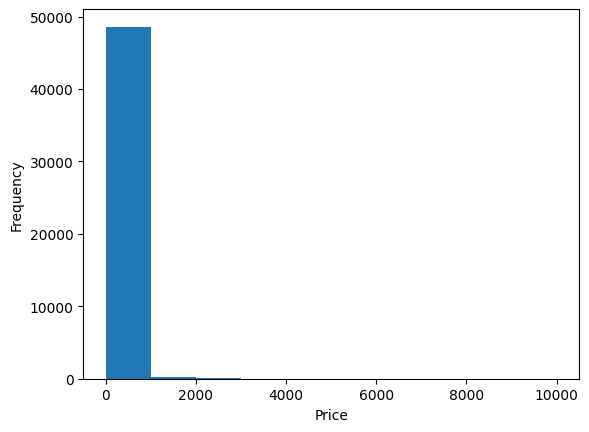

<Axes: xlabel='longitude', ylabel='latitude'>

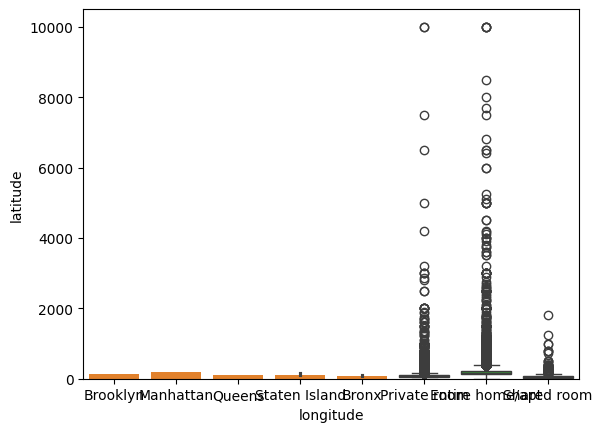

In [57]:
# Histogram
plt.hist(data['price']) # Replace 'price' with the actual column you want to plot.
plt.xlabel('Price') # Update the label accordingly.
plt.ylabel('Frequency')
plt.show()

# Scatter plot
sns.scatterplot(x='longitude', y='latitude', data=data) # Replace with relevant columns.

# Bar plot
sns.barplot(x='neighbourhood_group', y='price', data=data) # Replace with relevant columns.

# Box plot
sns.boxplot(x='room_type', y='price', data=data) # Replace with relevant columns.

In [59]:
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                                      id   host_id  latitude  longitude  \
id                              1.000000  0.588290 -0.003125   0.090908   
host_id                         0.588290  1.000000  0.020224   0.127055   
latitude                       -0.003125  0.020224  1.000000   0.084788   
longitude                       0.090908  0.127055  0.084788   1.000000   
price                           0.010619  0.015309  0.033939  -0.150019   
minimum_nights                 -0.013224 -0.017364  0.024869  -0.062747   
number_of_reviews              -0.319760 -0.140106 -0.015389   0.059094   
reviews_per_month               0.291828  0.296417 -0.010142   0.145948   
calculated_host_listings_count  0.133272  0.154950  0.019517  -0.114713   
availability_365                0.085468  0.203492 -0.010983   0.082731   

                                   price  minimum_nights  number_of_reviews  \
id                              0.010619       -0.013224          -0.319760   
host_id         

<Axes: >

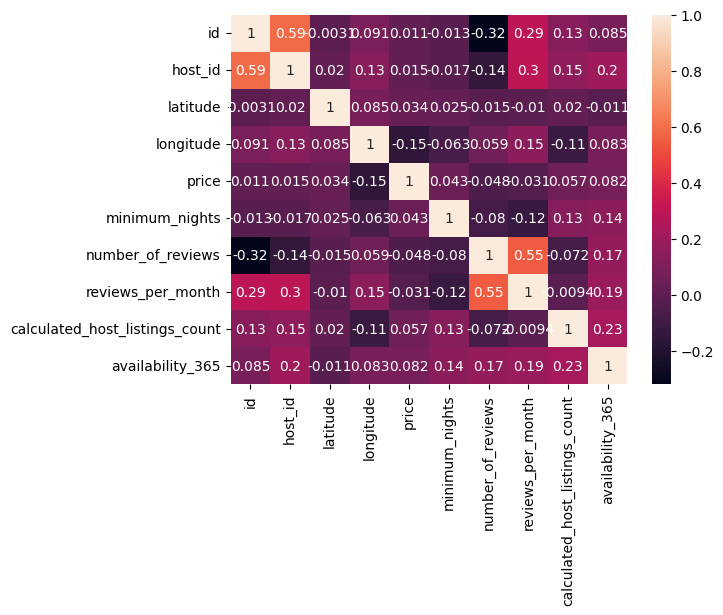

In [60]:
sns.heatmap(correlation_matrix, annot=True)